# 4) Building ML Models

Importing required libraries:

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import time
pd.set_option('display.max_columns', None)

Loading data set:

In [592]:
celebrities = pd.read_csv('Celebrities_Cleaned_Married.csv')
celebrities.describe()

,Number_of_Marriage,Number_of_Divorce,Number_of_Children,Marriages_End_in_Death,Number_of_Marriage_Spouse,Number_of_Divorce_Spouse,Number_of_Children_Spouse,First_Marriage,Age,Age_at_Marriage,Age_at_Divorce,Age_of_Spouse,Age_at_Marriage_Spouse,Age_at_Divorce_Spouse,Duration_of_Marriage,Age_Difference,Number_of_Roles,Spouse_is_Celebrity,Married,Divorced,Alive_or_Dead,Alive_or_Dead_Spouse,Latitude,Longitude,Latitude_Spouse,Longitude_Spouse,Distance
count,16770.000000,16770.000000,11011.000000,16770.000000,5042.000000,4600.000000,3375.000000,16770.000000,15707.000000,15558.000000,6559.000000,4891.000000,4867.000000,2250.000000,15534.000000,4583.000000,16770.000000,16770.000000,16770.0,16770.000000,16770.000000,16770.000000,15982.000000,15982.000000,4940.000000,4940.000000,4712.000000
mean,1.393679,0.632021,2.100627,0.144603,1.531932,0.853696,2.165926,0.194335,61.260966,29.953979,36.020582,61.542425,31.938566,38.336889,15.965817,6.394501,1.282349,0.127490,1.0,0.449672,0.333810,0.110972,33.258800,-22.009506,34.914601,-21.800480,2421.493675
std,0.728885,0.847140,1.135926,0.373102,0.875889,0.993624,1.183652,0.395700,18.328016,7.801117,9.634208,17.509857,8.279273,9.441840,14.801811,5.812522,0.605109,0.333531,0.0,0.497475,0.471587,0.314107,19.272817,82.194297,18.060025,81.662802,3354.893096
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,18.000000,15.000000,16.000000,21.000000,16.000000,18.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,-46.417871,-171.751355,-53.163384,-157.858140,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,46.000000,24.000000,29.000000,47.000000,26.000000,32.000000,5.000000,2.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,31.230416,-86.251990,32.776664,-85.548898,272.552629
50%,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,60.000000,29.000000,34.000000,60.000000,31.000000,37.000000,11.000000,5.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,39.290385,-71.599205,39.952584,-71.109733,1032.791734
75%,2.000000,1.000000,3.000000,0.000000,2.000000,1.000000,3.000000,0.000000,77.000000,34.000000,42.000000,76.000000,36.000000,44.000000,22.000000,9.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,42.331427,32.493155,43.003813,29.060964,3252.501789
max,5.000000,5.000000,7.000000,2.000000,5.000000,5.000000,7.000000,1.000000,105.000000,70.000000,70.000000,104.000000,70.000000,70.000000,70.000000,39.000000,4.000000,1.000000,1.0,1.000000,1.000000,1.000000,70.370640,176.919190,69.649772,175.209907,18737.941026


Categorizing the Sex column:

In [593]:
celebrities['Sex'] = celebrities['Sex'].replace({'F':0, 'M':1})

Choosing appropriate features for predicting divorce of celebrities:

In [594]:
columns_for_ML = ['Number_of_Children', 'Number_of_Children_Spouse', 'Sex', 'Age', 'Age_at_Marriage', 'Age_of_Spouse', 
                  'Age_at_Marriage_Spouse', 'Age_Difference', 'Number_of_Roles', 'Spouse_is_Celebrity', 'Distance', 'Divorced']
celebrities_ML = celebrities[columns_for_ML]

celebrities_ML.to_csv('Celebrities_Cleaned_Married_Imputed_ML.csv', index=True)

In [595]:
celebrities_ML.describe()

,Number_of_Children,Number_of_Children_Spouse,Sex,Age,Age_at_Marriage,Age_of_Spouse,Age_at_Marriage_Spouse,Age_Difference,Number_of_Roles,Spouse_is_Celebrity,Distance,Divorced
count,11011.000000,3375.000000,16770.00000,15707.000000,15558.000000,4891.000000,4867.000000,4583.000000,16770.000000,16770.000000,4712.000000,16770.000000
mean,2.100627,2.165926,0.46136,61.260966,29.953979,61.542425,31.938566,6.394501,1.282349,0.127490,2421.493675,0.449672
std,1.135926,1.183652,0.49852,18.328016,7.801117,17.509857,8.279273,5.812522,0.605109,0.333531,3354.893096,0.497475
min,1.000000,1.000000,0.00000,18.000000,15.000000,21.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.00000,46.000000,24.000000,47.000000,26.000000,2.000000,1.000000,0.000000,272.552629,0.000000
50%,2.000000,2.000000,0.00000,60.000000,29.000000,60.000000,31.000000,5.000000,1.000000,0.000000,1032.791734,0.000000
75%,3.000000,3.000000,1.00000,77.000000,34.000000,76.000000,36.000000,9.000000,1.000000,0.000000,3252.501789,1.000000
max,7.000000,7.000000,1.00000,105.000000,70.000000,104.000000,70.000000,39.000000,4.000000,1.000000,18737.941026,1.000000


There are missing values in features. To handle that we use knn imputer to fill those nan values. So first we iterate over number of neighbors for knn imputer to find for which value of n_neighbors, the accuracy is the highest. Then we apply the model to test set. we do the same strategy for different classifier algorithms namely, Logistic Regression, K-Nearest Neighbors (KNN) classifier, Support Vector Machine (SVM), Decision Tree classifier, Random Forest classifier, XGBoost classifier and neural network classifiers. 

# 1) Logistic Regression

In [17]:
start = time.time()

accuracy_average_lr = []

for k in range(5, 50):
    
    accuracy_average = 0 
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    n_splits =5
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 222)

    for train_idx, val_idx in kfold.split(X_train):
    
        X_train_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        lr = LogisticRegression(solver='liblinear', random_state= 13)
        lr.fit(X_train_train, y_train_train)
        y_pred = lr.predict(X_val) 
        
        accuracy_average += accuracy_score(y_val, y_pred)/n_splits
    
    accuracy_average_lr.append(accuracy_average)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

839.0556290149689


Text(0, 0.5, 'Accuracy')

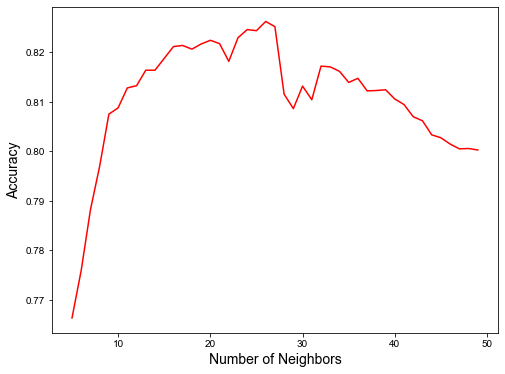

In [606]:
plt.figure(figsize=(8, 6))
plt.plot([k for k in range(5, 50)], accuracy_average_lr, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [607]:
Highest_accuracy_lr = max(accuracy_average_lr)
Best_Number_of_Neighbors_lr = 5 + np.argmax(accuracy_average_lr)
print(f'Highest accuracy for Logistic Regression: {Highest_accuracy_lr}')
print(f'Best number of neighbors for KNN imputer: {Best_Number_of_Neighbors_lr}' )

Highest accuracy for Logistic Regression: 0.82617696119465
Best number of neighbors for KNN imputer: 26


In [608]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_lr)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

lr = LogisticRegression(solver='liblinear', random_state= 13)
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train) 
y_pred_test = lr.predict(X_test)

Training_Accuracy_lr = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_lr = accuracy_score(y_test, y_pred_test)*100

In [648]:
columns = ['Model', 'Training Accuracy (%)', 'Testing Accuracy (%)', 'Number of Neighbors (Imputer)', 'Tuned Training Accuracy (%)', 'Tuned Testing Accuracy (%)' ,'Tuned Number of Neighbors (Imputer)']
data = [['Logistic Regression', Training_Accuracy_lr, Testing_Accuracy_lr, Best_Number_of_Neighbors_lr, np.nan, np.nan, np.nan]]

Models_results = pd.DataFrame(data = data, columns= columns)
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.34198,80.799046,26,NaN,NaN,NaN


In [649]:
pd.DataFrame(classification_report(y_train, y_pred_train, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.823993,0.822285,0.823271,0.823139,0.823226
recall,0.863581,0.773851,0.823271,0.818716,0.823271
f1-score,0.843323,0.797333,0.823271,0.820328,0.822662
support,7389.000000,6027.000000,0.823271,13416.000000,13416.000000


In [65]:
pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.799299,0.820796,0.80799,0.810048,0.809003
recall,0.867935,0.735139,0.80799,0.801537,0.807990
f1-score,0.832204,0.775610,0.80799,0.803907,0.806657
support,1840.000000,1514.000000,0.80799,3354.000000,3354.000000


In [66]:
confusion_matrix(y_train, y_pred_train)

array([[6390,  999],
       [1370, 4657]])

In [67]:
confusion_matrix(y_test, y_pred_test)

array([[1597,  243],
       [ 401, 1113]])

# 2) K Nearest-Neighbors Classifier

In [40]:
start = time.time()

accuracy_average_knn = []

for k in range(5, 50):
    
    accuracy_average = 0 
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    n_splits = 5
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 222)

    for train_idx, val_idx in kfold.split(X_train):
    
        X_train_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        knn = KNeighborsClassifier()
        knn.fit(X_train_train, y_train_train)
        
        y_pred = knn.predict(X_val) 
        accuracy_average += accuracy_score(y_val, y_pred)/n_splits

    accuracy_average_knn.append(accuracy_average)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

713.1098091602325


Text(0, 0.5, 'Accuracy')

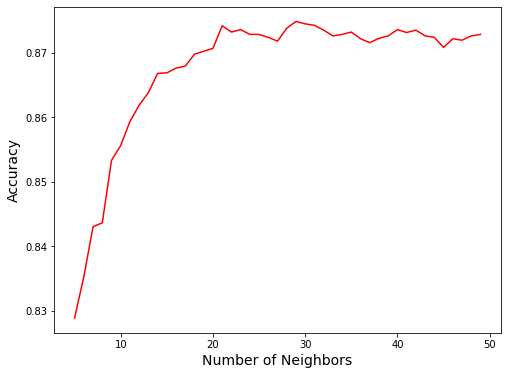

In [391]:
plt.figure(figsize=(8, 6))
plt.plot([k for k in range(5, 50)], accuracy_average_knn, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [393]:
Highest_accuracy_knn = max(accuracy_average_knn)
Best_Number_of_Neighbors_knn = 5 + np.argmax(accuracy_average_knn)
print(f'Highest accuracy for K-Nearest Neighbors: {Highest_accuracy_knn}')
print(f'Best number of neighbors for KNN imputer: {Best_Number_of_Neighbors_knn}' )

Highest accuracy for K-Nearest Neighbors: 0.8748503160318903
Best number of neighbors for KNN imputer: 29


In [70]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_knn)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

knn = KNeighborsClassifier()
knn.fit(X_train_train, y_train_train)
y_pred_train = knn.predict(X_train) 
y_pred_test = knn.predict(X_test)

Training_Accuracy_knn = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_knn = accuracy_score(y_test, y_pred_test)*100

In [650]:
row_new = {'Model': 'K Nearest Neighbors',
           'Training Accuracy (%)': Training_Accuracy_knn,
           'Testing Accuracy (%)': Testing_Accuracy_knn,
           'Number of Neighbors (Imputer)': Best_Number_of_Neighbors_knn,
           'Tuned Training Accuracy (%)': np.nan,
           'Tuned Testing Accuracy (%)': np.nan,
           'Tuned Number of Neighbors (Imputer)': np.nan}

df = pd.DataFrame([row_new], index=[0])

Models_results = pd.concat([Models_results, df], ignore_index=True)

In [651]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,NaN,NaN,NaN
1,K Nearest Neighbors,82.349434,81.365534,29,NaN,NaN,NaN


# 3) Support Vector Machine

In [41]:
start = time.time()

accuracy_average_svm = []

for k in range(5, 50):
    
    accuracy_average = 0 
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    n_splits =5
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 222)
    
    acuracy_average = 0 

    for train_idx, val_idx in kfold.split(X_train):
    
        X_train_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        svm = SVC(kernel='rbf', gamma=0.1, C=1, random_state= 111)
        svm.fit(X_train_train, y_train_train)
        y_pred = svm.predict(X_val)
        
        accuracy_average += accuracy_score(y_val, y_pred)/n_splits

    accuracy_average_svm.append(accuracy_average)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

1178.2192640304565


Text(0, 0.5, 'Accuracy')

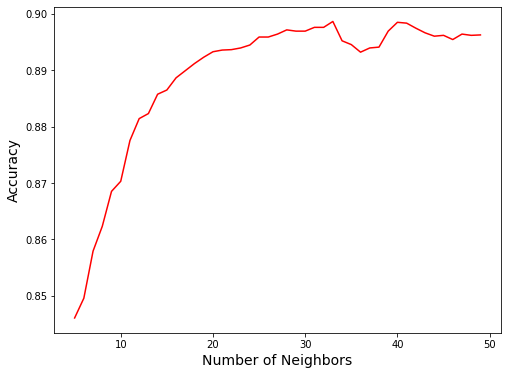

In [80]:
plt.figure(figsize=(8, 6))
plt.plot([k for k in range(5, 50)], accuracy_average_svm, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [394]:
Highest_accuracy_svm = max(accuracy_average_svm)
Best_Number_of_Neighbors_svm = 5 + np.argmax(accuracy_average_svm)
print(f'Highest accuracy for Support Vector Machine: {Highest_accuracy_svm}')
print(f'Best number of neighbors for KNN imputer: {Best_Number_of_Neighbors_svm}' )

Highest accuracy for Support Vector Machine: 0.8986285843471034
Best number of neighbors for KNN imputer: 33


In [83]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_svm)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

svm = SVC(kernel='rbf', gamma=0.1, C=1, random_state= 111)
svm.fit(X_train_train, y_train_train)
y_pred_train = svm.predict(X_train) 
y_pred_test = svm.predict(X_test)

Training_Accuracy_svm = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_svm = accuracy_score(y_test, y_pred_test)*100

In [652]:
row_new = {'Model': 'Support Vector Machine',
           'Training Accuracy (%)': Training_Accuracy_svm,
           'Testing Accuracy (%)': Testing_Accuracy_svm,
           'Number of Neighbors (Imputer)': Best_Number_of_Neighbors_svm,
           'Tuned Training Accuracy (%)': np.nan,
           'Tuned Testing Accuracy (%)': np.nan,
           'Tuned Number of Neighbors (Imputer)': np.nan}

df = pd.DataFrame([row_new], index=[0])

Models_results = pd.concat([Models_results, df], ignore_index=True )

In [653]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,NaN,NaN,NaN
1,K Nearest Neighbors,82.349434,81.365534,29,NaN,NaN,NaN
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN


# 4) Decision Tree Classifier

In [42]:
start = time.time()

accuracy_average_tree = []

for k in range(5, 50):
    
    accuracy_average = 0 
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    n_splits =5
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 222)
    
    acuracy_average = 0 

    for train_idx, val_idx in kfold.split(X_train):
    
        X_train_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        tree = DecisionTreeClassifier(random_state=303)
        tree.fit(X_train_train, y_train_train)
        y_pred = tree.predict(X_val)
        
        accuracy_average += accuracy_score(y_val, y_pred)/n_splits
        
    accuracy_average_tree.append(accuracy_average)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

676.6053950786591


Text(0, 0.5, 'Accuracy')

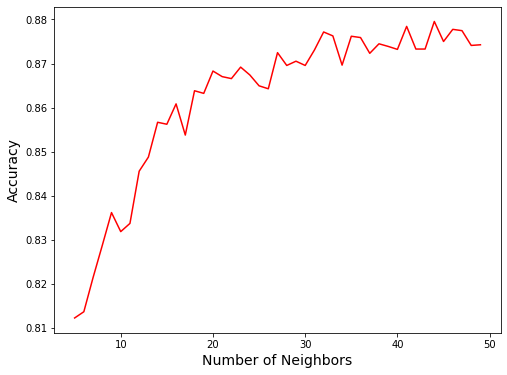

In [86]:
plt.figure(figsize=(8, 6))
plt.plot([k for k in range(5, 50)], accuracy_average_tree, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [395]:
Highest_accuracy_tree = max(accuracy_average_tree)
Best_Number_of_Neighbors_tree = 5 + np.argmax(accuracy_average_tree)
print(f'Highest accuracy for Decision tree: {Highest_accuracy_tree}')
print(f'Best number of neighbors for KNN imputer: {Best_Number_of_Neighbors_tree}' )

Highest accuracy for Decision tree: 0.8795464960425886
Best number of neighbors for KNN imputer: 44


In [89]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_tree)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

tree = DecisionTreeClassifier(random_state=303)
tree.fit(X_train_train, y_train_train)
y_pred_train = tree.predict(X_train) 
y_pred_test = tree.predict(X_test)

Training_Accuracy_tree = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_tree = accuracy_score(y_test, y_pred_test)*100

In [654]:
row_new = {'Model': 'Decision Tree',
           'Training Accuracy (%)': Training_Accuracy_tree,
           'Testing Accuracy (%)': Testing_Accuracy_tree,
           'Number of Neighbors (Imputer)': Best_Number_of_Neighbors_tree,
           'Tuned Training Accuracy (%)': np.nan,
           'Tuned Testing Accuracy (%)': np.nan,
           'Tuned Number of Neighbors (Imputer)': np.nan}

df = pd.DataFrame([row_new], index=[0])

Models_results = pd.concat([Models_results, df], ignore_index=True )

In [655]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,NaN,NaN,NaN
1,K Nearest Neighbors,82.349434,81.365534,29,NaN,NaN,NaN
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,NaN,NaN,NaN


# 5) Random Forrest Classifier

In [138]:
start = time.time()

accuracy_average_forest = []

for k in range(5, 50):
    
    accuracy_average = 0 
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    n_splits =5
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 222)
    
    acuracy_average = 0 

    for train_idx, val_idx in kfold.split(X_train):
    
        X_train_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        rf = RandomForestClassifier(n_estimators=1000, random_state=359)
        rf.fit(X_train_train, y_train_train)
        y_pred = rf.predict(X_val)
        
        accuracy_average += accuracy_score(y_val, y_pred)/n_splits
        
    accuracy_average_forest.append(accuracy_average)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

3792.2296788692474


Text(0, 0.5, 'Accuracy')

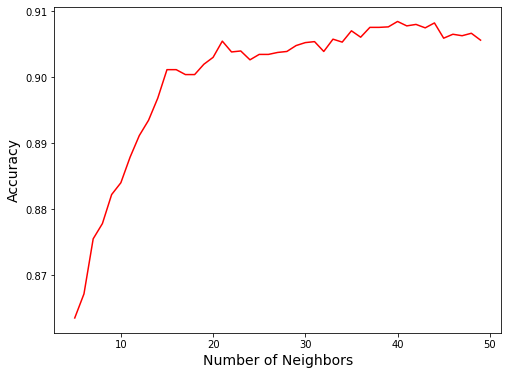

In [141]:
plt.figure(figsize=(8, 6))
plt.plot([k for k in range(5, 50)], accuracy_average_forest, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [396]:
Highest_accuracy_forest = max(accuracy_average_forest)
Best_Number_of_Neighbors_forest = 5 + np.argmax(accuracy_average_forest)
print(f'Highest accuracy for Random Forest: {Highest_accuracy_forest}')
print(f'Best number of neighbors for KNN imputer: {Best_Number_of_Neighbors_forest}' )

Highest accuracy for Random Forest: 0.9084677327523909
Best number of neighbors for KNN imputer: 40


In [143]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_tree)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

rf = RandomForestClassifier(n_estimators=1000, random_state=359)
rf.fit(X_train_train, y_train_train)
y_pred_train = rf.predict(X_train) 
y_pred_test = rf.predict(X_test)

Training_Accuracy_forest = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_forest = accuracy_score(y_test, y_pred_test)*100

In [656]:
row_new = {'Model': 'Random Forest',
           'Training Accuracy (%)': Training_Accuracy_forest,
           'Testing Accuracy (%)': Testing_Accuracy_forest,
           'Number of Neighbors (Imputer)': Best_Number_of_Neighbors_forest,
           'Tuned Training Accuracy (%)': np.nan,
           'Tuned Testing Accuracy (%)': np.nan,
           'Tuned Number of Neighbors (Imputer)': np.nan}

df = pd.DataFrame([row_new], index=[0])

Models_results = pd.concat([Models_results, df], ignore_index=True )

In [657]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,NaN,NaN,NaN
1,K Nearest Neighbors,82.349434,81.365534,29,NaN,NaN,NaN
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,NaN,NaN,NaN
4,Random Forest,96.101670,96.094216,40,NaN,NaN,NaN


# 6) XGBoost Classifier

In [605]:
start = time.time()

accuracy_average_xgboost = []

for k in range(5, 50):
    
    accuracy_average = 0 
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    n_splits =5
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 222)
    
    acuracy_average = 0 

    for train_idx, val_idx in kfold.split(X_train):
    
        X_train_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        xgb = XGBClassifier(use_label_encoder=False)
        xgb.fit(X_train_train, y_train_train)
        y_pred = xgb.predict(X_val)
        
        accuracy_average += accuracy_score(y_val, y_pred)/n_splits
        
    accuracy_average_xgboost.append(accuracy_average)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

916.474454164505


Text(0, 0.5, 'Accuracy')

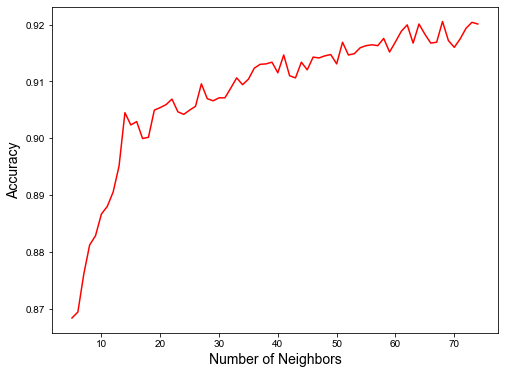

In [600]:
plt.figure(figsize=(8, 6))
plt.plot([k for k in range(5, 75)], accuracy_average_xgboost, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [601]:
Highest_accuracy_xgboost = max(accuracy_average_xgboost)
Best_Number_of_Neighbors_xgboost = 5 + np.argmax(accuracy_average_xgboost)
print(f'Highest accuracy for XGBoost: {Highest_accuracy_xgboost}')
print(f'Best number of neighbors for KNN imputer: {Best_Number_of_Neighbors_xgboost}' )

Highest accuracy for XGBoost: 0.9205431838039697
Best number of neighbors for KNN imputer: 68


In [602]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_xgboost)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train_train, y_train_train)
y_pred_train = xgb.predict(X_train) 
y_pred_test = xgb.predict(X_test)

Training_Accuracy_xgboost = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_xgboost = accuracy_score(y_test, y_pred_test)*100

In [658]:
row_new = {'Model': 'XGBoost',
           'Training Accuracy (%)': Training_Accuracy_xgboost,
           'Testing Accuracy (%)': Testing_Accuracy_xgboost,
           'Number of Neighbors (Imputer)': Best_Number_of_Neighbors_xgboost,
           'Tuned Training Accuracy (%)': np.nan,
           'Tuned Testing Accuracy (%)': np.nan,
           'Tuned Number of Neighbors (Imputer)': np.nan}

df = pd.DataFrame([row_new], index=[0])

Models_results = pd.concat([Models_results, df], ignore_index=True )

In [659]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,NaN,NaN,NaN
1,K Nearest Neighbors,82.349434,81.365534,29,NaN,NaN,NaN
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,NaN,NaN,NaN
4,Random Forest,96.101670,96.094216,40,NaN,NaN,NaN
5,XGBoost,94.514013,94.514013,68,NaN,NaN,NaN


Now we will use hyperparameter tuning to see we can increase the accuracy more!

# 7) Logestic Regression Hyperparameter Tuning

In [634]:
start = time.time()

best_accuracy_lr = []
best_parameters_lr = []

params = {"C": np.logspace(-1, 1, 100),
          "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression()

for k in range(5, 50):
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    lr_cv = GridSearchCV(lr, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
    lr_cv.fit(X_train, y_train)
    
    best_accuracy_lr.append(lr_cv.best_score_)
    best_parameters_lr.append(lr_cv.best_params_)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 600 candidat

Text(0, 0.5, 'Accuracy')

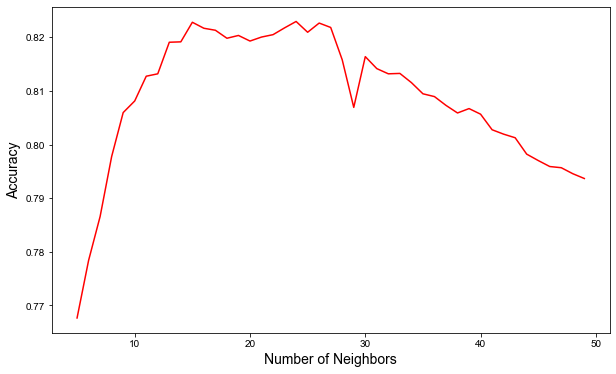

In [635]:
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(5, 50)], best_accuracy_lr, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [636]:
Highest_accuracy_lr_tuned = max(best_accuracy_lr)
Best_Number_of_Neighbors_lr_tuned = 5 + np.argmax(best_accuracy_lr)
best_parameters_lr = best_parameters_lr[np.argmax(best_accuracy_lr)]
print(f'Highest accuracy for Logistic Regression (hyperparameters tuned): {Highest_accuracy_lr_tuned}')
print(f'Best number of neighbors for imputer: {Best_Number_of_Neighbors_lr_tuned}')
print(f'Best set of hyperparameters: {best_parameters_lr}')

Highest accuracy for Logistic Regression (hyperparameters tuned): 0.8229728160916029
Best number of neighbors for imputer: 24
Best set of hyperparameters: {'C': 10.0, 'solver': 'sag'}


In [637]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_lr_tuned)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

lr_tuned = LogisticRegression(**best_parameters_lr, random_state=104)
lr_tuned.fit(X_train, y_train)
y_pred_train = lr_tuned.predict(X_train) 
y_pred_test = lr_tuned.predict(X_test)

Training_Accuracy_lr_tuned = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_lr_tuned = accuracy_score(y_test, y_pred_test)*100

In [660]:
Models_results.loc[0, 'Tuned Training Accuracy (%)'] = Training_Accuracy_lr_tuned
Models_results.loc[0, 'Tuned Testing Accuracy (%)'] = Testing_Accuracy_lr_tuned
Models_results.loc[0, 'Tuned Number of Neighbors (Imputer)'] = int(Best_Number_of_Neighbors_lr_tuned)

In [661]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,82.327072,80.500894,24.0
1,K Nearest Neighbors,82.349434,81.365534,29,NaN,NaN,NaN
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,NaN,NaN,NaN
4,Random Forest,96.101670,96.094216,40,NaN,NaN,NaN
5,XGBoost,94.514013,94.514013,68,NaN,NaN,NaN


# 8) K-Nearest Neighbors Hyperparameter Tuning

In [364]:
start = time.time()

accuracy_average_knn_tuned = []
best_k_tuned = []

for m in range(5, 50):
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=m)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    n_splits = 5
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 222)

    best_score = 0
    best_k = None
        
    for k in range(5, 50):
        
        accuracy_average = 0
        
        for train_idx, val_idx in kfold.split(X_train):

            X_train_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            knn_tuned = KNeighborsClassifier(n_neighbors= k)
            knn_tuned.fit(X_train_train, y_train_train)

            y_pred = knn_tuned.predict(X_val)
            accuracy_average += accuracy_score(y_val, y_pred)/n_splits
        
        score = accuracy_average

        if score>best_score:
            best_score = score
            best_k = k
            
    accuracy_average_knn_tuned.append(best_score)
    best_k_tuned.append(best_k)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

4601.579907178879


Text(0, 0.5, 'Accuracy')

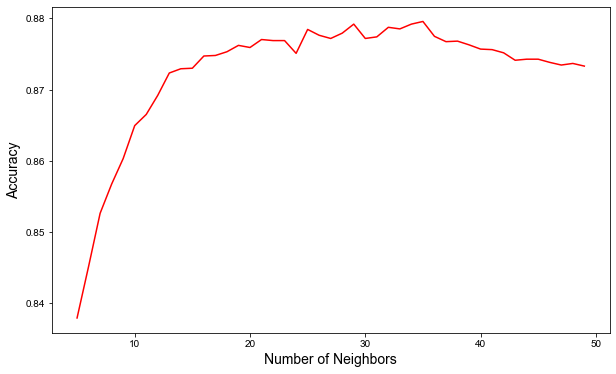

In [624]:
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(5, 50)], accuracy_average_knn_tuned, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [432]:
Highest_accuracy_knn_tuned = max(accuracy_average_knn_tuned)
Best_Number_of_Neighbors_knn_tuned = 5 + np.argmax(accuracy_average_knn_tuned)
Best_parameters_knn = best_k_tuned[np.argmax(accuracy_average_knn_tuned)]
print(f'Highest accuracy for Logistic Regression (hyperparameters tuned): {Highest_accuracy_knn_tuned}')
print(f'Best number of neighbors for imputer: {Best_Number_of_Neighbors_knn_tuned}')
print(f'Best number of neighbors for KNN: {Best_parameters_knn}')

Highest accuracy for Logistic Regression (hyperparameters tuned): 0.8795459128041936
Best number of neighbors for imputer: 35
Best number of neighbors for KNN: 11


In [374]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_knn_tuned)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

knn_tuned = KNeighborsClassifier(n_neighbors = Best_parameters_knn)
knn_tuned.fit(X_train, y_train)
y_pred_train = knn_tuned.predict(X_train) 
y_pred_test = lr_tuned.predict(X_test)

Training_Accuracy_knn_tuned = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_knn_tuned = accuracy_score(y_test, y_pred_test)*100

In [662]:
Models_results.loc[1, 'Tuned Training Accuracy (%)'] = Training_Accuracy_knn_tuned
Models_results.loc[1, 'Tuned Testing Accuracy (%)'] = Testing_Accuracy_knn_tuned
Models_results.loc[1, 'Tuned Number of Neighbors (Imputer)'] = int(Best_Number_of_Neighbors_knn_tuned)

In [663]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,82.327072,80.500894,24.0
1,K Nearest Neighbors,82.349434,81.365534,29,89.974657,80.023852,35.0
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,NaN,NaN,NaN
4,Random Forest,96.101670,96.094216,40,NaN,NaN,NaN
5,XGBoost,94.514013,94.514013,68,NaN,NaN,NaN


# 9) Support Vector Machine Hyperparameters Tuning

In [ ]:
start = time.time()

best_accuracy_svm = []
best_parameters_svm = []

svm = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 1, 10), 
          "gamma":(0.001, 0.01, 0.1, 1), 
          "kernel":('linear', 'poly', 'rbf')}               

for k in range(5, 6):
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    svm_cv = GridSearchCV(svm, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
    svm_cv.fit(X_train, y_train)
    
    best_accuracy_svm.append(svm_cv.best_score_)
    best_parameters_svm.append(svm_cv.best_params_)

end = time.time()
elapsed_time = end-start
print(elapsed_time)



In [ ]:
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(5, 50)], best_accuracy_svm, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [ ]:
Highest_accuracy_svm_tuned = max(best_accuracy_svm)
Best_Number_of_Neighbors_svm_tuned = 5 + np.argmax(best_accuracy_svm)
Best_Parameters_svm = best_parameters_svm[np.argmax(best_accuracy_svm)]
print(f'Highest accuracy for Support Vector machine (hyperparameters tuned): {Highest_accuracy_svm_tuned}')
print(f'Best number of neighbors for imputer: {Best_Number_of_Neighbors_svm_tuned}')
print(f'Best set of hyperparameters: {Best_Parameters_svm}')

In [ ]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_knn_tuned)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

svm_tuned = SVC(**best)
svm_tuned.fit(X_train, y_train)
y_pred_train = svm_tuned.predict(X_train) 
y_pred_test = svm_tuned.predict(X_test)

Training_Accuracy_svm_tuned = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_svm_tuned = accuracy_score(y_test, y_pred_test)*100

In [ ]:
Models_results.loc[1, 'Tuned Training Accuracy (%)'] = Training_Accuracy_svm_tuned
Models_results.loc[1, 'Tuned Testing Accuracy (%)'] = Testing_Accuracy_svm_tuned
Models_results.loc[1, 'Tuned Number of Neighbors (Imputer)'] = int(Best_Number_of_Neighbors_svm_tuned)

I found that computationally is expansive to run the code for hyperparameter tuning code in case of support vector machine algorithm. So skip this part. 

# 10) Decision Tree Hyperparameter Tuning

In [426]:
start = time.time()

best_accuracy_tree = []
best_parameters_tree = []

tree = DecisionTreeClassifier(random_state=406)

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

for k in range(5, 50):
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    tree_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
    tree_cv.fit(X_train, y_train)
    best_params = tree_cv.best_params_

    best_accuracy_tree.append(tree_cv.best_score_)
    best_parameters_tree.append(tree_cv.best_params_)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Fitting 5 

Text(0, 0.5, 'Accuracy')

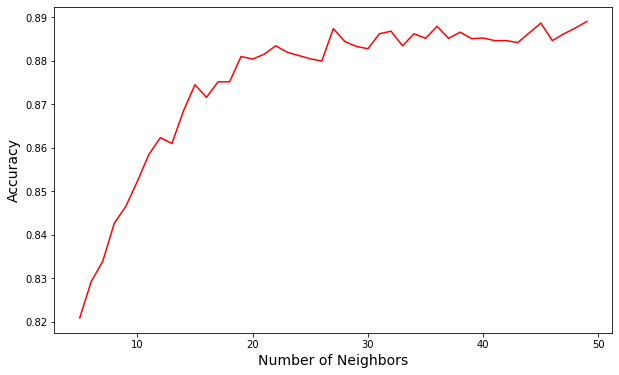

In [429]:
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(5, 50)], best_accuracy_tree, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [430]:
Highest_accuracy_tree_tuned = max(best_accuracy_tree)
Best_Number_of_Neighbors_tree_tuned = 5 + np.argmax(best_accuracy_tree)
best_parameters_tree = best_parameters_tree[np.argmax(best_accuracy_tree)]
print(f'Highest accuracy for Decision Tree (hyperparameters tuned): {Highest_accuracy_tree_tuned}')
print(f'Best number of neighbors for imputer: {Best_Number_of_Neighbors_tree_tuned}')
print(f'Best set of hyperparameters: {best_parameters_tree}')

Highest accuracy for Decision Tree (hyperparameters tuned): 0.8890129828866744
Best number of neighbors for imputer: 49
Best set of hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [441]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_tree_tuned)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

tree_tuned = DecisionTreeClassifier(**best_parameters_tree, random_state = 406 )
tree_tuned.fit(X_train, y_train)
y_pred_train = tree_tuned.predict(X_train) 
y_pred_test = tree_tuned.predict(X_test)

Training_Accuracy_tree_tuned = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_tree_tuned = accuracy_score(y_test, y_pred_test)*100

In [664]:
Models_results.loc[3, 'Tuned Training Accuracy (%)'] = Training_Accuracy_tree_tuned
Models_results.loc[3, 'Tuned Testing Accuracy (%)'] = Testing_Accuracy_tree_tuned
Models_results.loc[3, 'Tuned Number of Neighbors (Imputer)'] = int(Best_Number_of_Neighbors_tree_tuned)

In [665]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,82.327072,80.500894,24.0
1,K Nearest Neighbors,82.349434,81.365534,29,89.974657,80.023852,35.0
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,91.703936,88.073942,49.0
4,Random Forest,96.101670,96.094216,40,NaN,NaN,NaN
5,XGBoost,94.514013,94.514013,68,NaN,NaN,NaN


# 11) Random Forest Hyperparameter Tuning

In [ ]:
start = time.time()

best_accuracy_forest = []
best_parameters_forest = []

rf = RandomForestClassifier(random_state=42)

n_estimators = [500, 900, 1100, 1500]
max_features = ['log2', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}

for k in range(40, 41):
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    rf_cv = GridSearchCV(rf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
    rf_cv.fit(X_train, y_train)
    
    best_accuracy_forest.append(tree_cv.best_score_)
    best_parameters_forest.append(tree_cv.best_params_)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

I run the code on HPC for k = (5, 50) and here are the results:

In [491]:
best_accuracy_forest = np.loadtxt('best_accuracy_forest.txt')

with open('/Users/meysammotaharfar/Documents/Data Science/Python/Web Scraping/Notebooks/best_parameters_forest.txt', 'r') as file:
    best_parameters_forest = []
    for line in file:
        params_dict = eval(line.strip())
        best_parameters_forest.append(params_dict)

Text(0, 0.5, 'Accuracy')

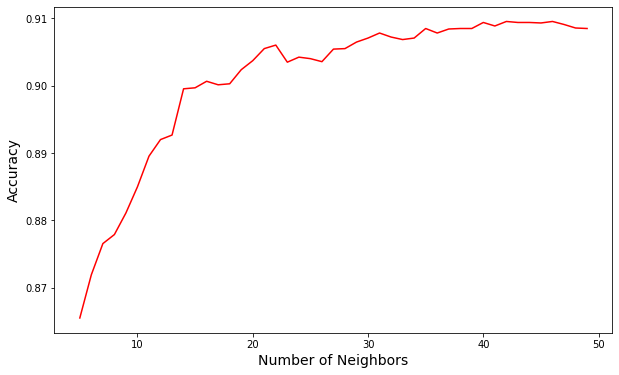

In [494]:
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(5, 50)], best_accuracy_forest, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [495]:
Highest_accuracy_forest_tuned = max(best_accuracy_forest)
Best_Number_of_Neighbors_forest_tuned = 5 + np.argmax(best_accuracy_forest)
best_parameters_forest = best_parameters_forest[np.argmax(best_accuracy_forest)]
print(f'Highest accuracy for Random Forest (hyperparameters tuned): {Highest_accuracy_forest_tuned}')
print(f'Best number of neighbors for imputer: {Best_Number_of_Neighbors_forest_tuned}')
print(f'Best set of hyperparameters: {best_parameters_forest}')

Highest accuracy for Random Forest (hyperparameters tuned): 0.9095111462411953
Best number of neighbors for imputer: 46
Best set of hyperparameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}


In [496]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_forest_tuned)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

rf_tuned = RandomForestClassifier(**best_parameters_forest, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_train = rf_tuned.predict(X_train) 
y_pred_test = rf_tuned.predict(X_test)

Training_Accuracy_rf_tuned = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_rf_tuned = accuracy_score(y_test, y_pred_test)*100

In [666]:
Models_results.loc[4, 'Tuned Training Accuracy (%)'] = Training_Accuracy_rf_tuned
Models_results.loc[4, 'Tuned Testing Accuracy (%)'] = Testing_Accuracy_rf_tuned
Models_results.loc[4, 'Tuned Number of Neighbors (Imputer)'] = int(Best_Number_of_Neighbors_forest_tuned)

In [667]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,82.327072,80.500894,24.0
1,K Nearest Neighbors,82.349434,81.365534,29,89.974657,80.023852,35.0
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,91.703936,88.073942,49.0
4,Random Forest,96.101670,96.094216,40,99.992546,90.369708,46.0
5,XGBoost,94.514013,94.514013,68,NaN,NaN,NaN


# 12) XGBoost Hyperparameter Tuning

In [ ]:
import warnings

# Ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning) 

start = time.time()

best_accuracy_xgb = []
best_parameters_xgb = []

xgb = XGBClassifier(use_label_encoder=False, random_state = 101)

param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

for k in range(5, 6):
    
    celebrities_ML_copy = celebrities_ML.copy()

    knn_imputer = KNNImputer(n_neighbors=k)
    celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)
    
    columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
    scaler = StandardScaler()
    celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])
    
    X = celebrities_ML_copy.drop(columns= 'Divorced')
    y = celebrities_ML_copy['Divorced']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)
    
    xgb_cv = RandomizedSearchCV(xgb, param_grid, cv=5, n_iter=150, scoring='accuracy', n_jobs=-1, verbose=1)
    xgb_cv.fit(X_train, y_train)
    
    best_accuracy_xgb.append(xgb_cv.best_score_)
    best_parameters_xgb.append(xgb_cv.best_params_)

end = time.time()
elapsed_time = end-start
print(elapsed_time)

I run the code on HPC for k= (5, 50) and here are the results:

In [509]:
best_accuracy_xgb = np.loadtxt('best_accuracy_xgb.txt')

with open('/Users/meysammotaharfar/Documents/Data Science/Python/Web Scraping/Notebooks/best_parameters_xgb.txt', 'r') as file:
    best_parameters_xgb = []
    for line in file:
        params_dict = eval(line.strip())
        best_parameters_xgb.append(params_dict)

Text(0, 0.5, 'Accuracy')

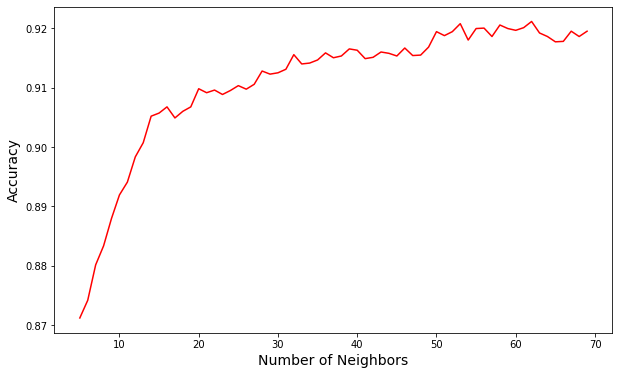

In [503]:
plt.figure(figsize=(10, 6))
plt.plot([k for k in range(5, 70)], best_accuracy_xgb, color = 'red')
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

In [511]:
Highest_accuracy_xgb_tuned = max(best_accuracy_xgb)
Best_Number_of_Neighbors_xgb_tuned = 5 + np.argmax(best_accuracy_xgb)
best_parameters_xgb = best_parameters_xgb[np.argmax(best_accuracy_xgb)]
print(f'Highest accuracy for XGBoost Classifier (hyperparameters tuned): {Highest_accuracy_xgb_tuned}')
print(f'Best number of neighbors for imputer: {Best_Number_of_Neighbors_xgb_tuned}')
print(f'Best set of hyperparameters: {best_parameters_xgb}')

Highest accuracy for XGBoost Classifier (hyperparameters tuned): 0.9211390312576897
Best number of neighbors for imputer: 62
Best set of hyperparameters: {'learning_rate': 0.1134189403446001, 'max_depth': 8, 'n_estimators': 591}


In [512]:
celebrities_ML_copy = celebrities_ML.copy()

knn_imputer = KNNImputer(n_neighbors=Best_Number_of_Neighbors_xgb_tuned)
celebrities_ML_copy[celebrities_ML_copy.columns] = knn_imputer.fit_transform(celebrities_ML_copy)

columns_to_standardize = [col for col in celebrities_ML_copy.columns if col != 'Divorced']
scaler = StandardScaler()
celebrities_ML_copy[columns_to_standardize] = scaler.fit_transform(celebrities_ML_copy[columns_to_standardize])

X = celebrities_ML_copy.drop(columns= 'Divorced')
y = celebrities_ML_copy['Divorced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

xgb_tuned = XGBClassifier(**best_parameters_xgb, use_label_encoder=False)
xgb_tuned.fit(X_train, y_train)
y_pred_train = xgb_tuned.predict(X_train) 
y_pred_test = xgb_tuned.predict(X_test)

Training_Accuracy_xgb_tuned = accuracy_score(y_train, y_pred_train)*100
Testing_Accuracy_xgb_tuned = accuracy_score(y_test, y_pred_test)*100

In [668]:
Models_results.loc[5, 'Tuned Training Accuracy (%)'] = Training_Accuracy_xgb_tuned
Models_results.loc[5, 'Tuned Testing Accuracy (%)'] = Testing_Accuracy_xgb_tuned
Models_results.loc[5, 'Tuned Number of Neighbors (Imputer)'] = int(Best_Number_of_Neighbors_xgb_tuned)

In [669]:
Models_results

,Model,Training Accuracy (%),Testing Accuracy (%),Number of Neighbors (Imputer),Tuned Training Accuracy (%),Tuned Testing Accuracy (%),Tuned Number of Neighbors (Imputer)
0,Logistic Regression,82.341980,80.799046,26,82.327072,80.500894,24.0
1,K Nearest Neighbors,82.349434,81.365534,29,89.974657,80.023852,35.0
2,Support Vector Machine,90.608229,90.011926,33,NaN,NaN,NaN
3,Decision Tree,92.180978,92.307692,44,91.703936,88.073942,49.0
4,Random Forest,96.101670,96.094216,40,99.992546,90.369708,46.0
5,XGBoost,94.514013,94.514013,68,100.000000,91.383423,62.0


# Summary and Results

Here are the results:

/var/folders/hp/1wt3j78513jd47vndbbz15rr0000gn/T/ipykernel_53064/497811485.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)


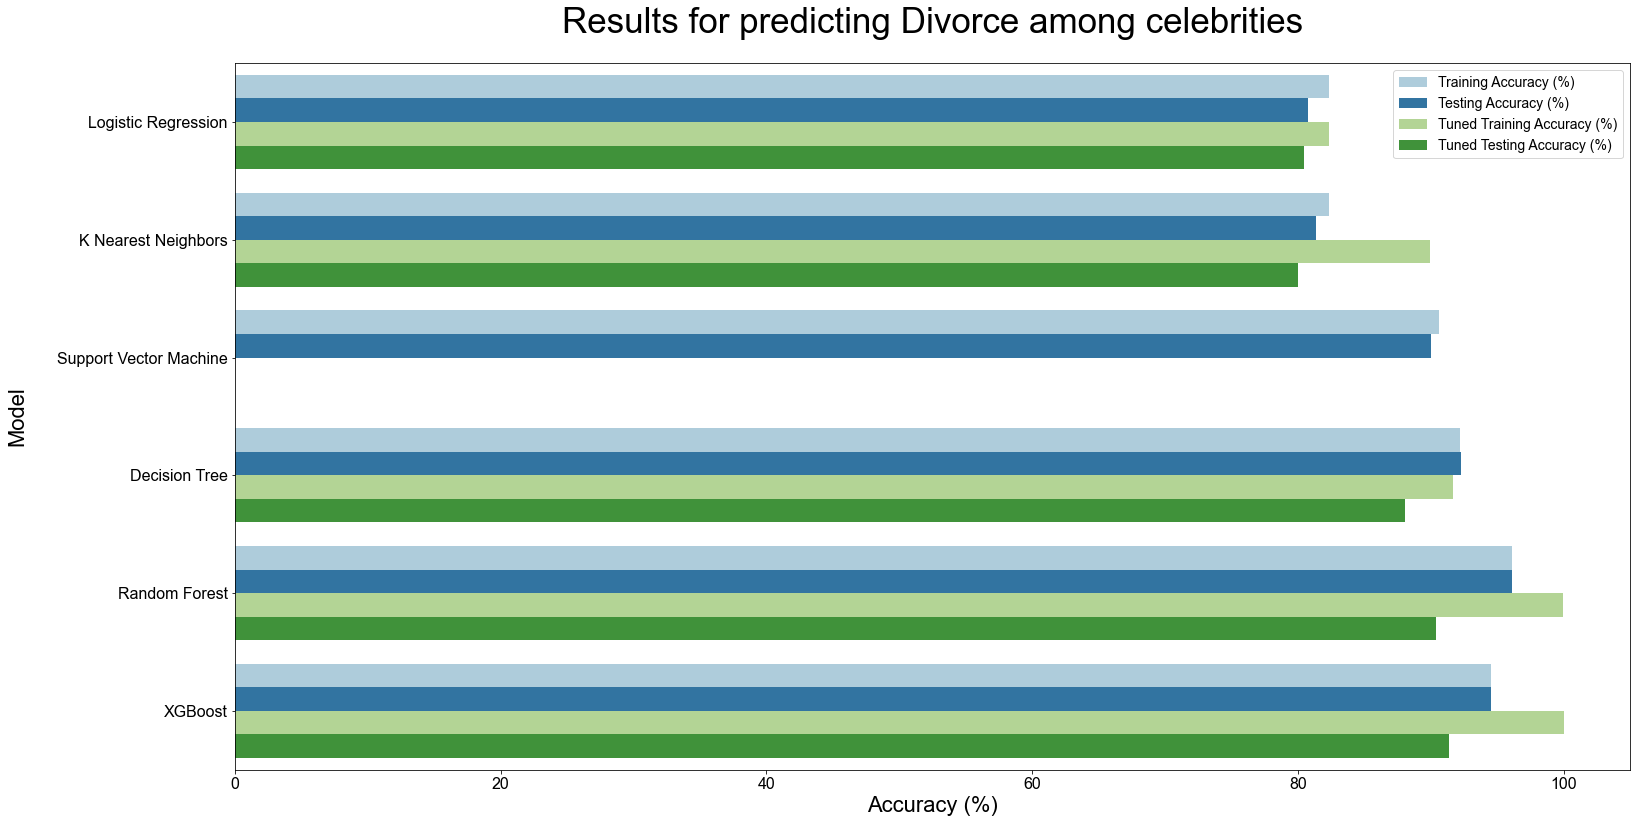

In [671]:
melted_Models_results = pd.melt(
    Models_results,
    id_vars=["Model"],
    value_vars=[
        "Training Accuracy (%)",
        "Testing Accuracy (%)",
        "Tuned Training Accuracy (%)",
        "Tuned Testing Accuracy (%)",
    ],
    var_name="Accuracy Type",
    value_name="Accuracy Value",
)

plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(25, 13))
ax = sns.barplot(data = melted_Models_results, y = 'Model', x = 'Accuracy Value', hue= 'Accuracy Type', palette='Paired')
ax.set_ylabel('Model', fontsize=22, labelpad=30)
ax.set_xlabel('Accuracy (%)', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)  
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
ax.legend(fontsize = 14)
ax.set_title('Results for predicting Divorce among celebrities', fontsize = 35, pad = 30)
plt.savefig('divorce_prediction_results.png', dpi=300, bbox_inches='tight')